In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [3]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [4]:
x_train.shape

(60000, 28, 28)

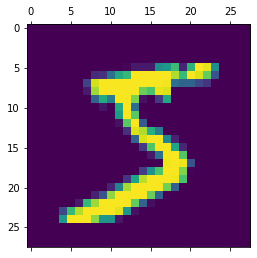

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.matshow(x_train[0])

In [6]:
y_train[0]

5

In [7]:
x_train_flattened=x_train.reshape(len(x_train),(28*28))
x_train_flattened.shape

(60000, 784)

In [8]:
x_test_flattened=x_test.reshape(len(x_test),(28*28))
x_test_flattened.shape

(10000, 784)

In [16]:
x_test_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [41]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 108s 57ms/step - loss: 1.9375 - accuracy: 0.9180
Epoch 2/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.2062 - accuracy: 0.9485
Epoch 3/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.1872 - accuracy: 0.9531s -
Epoch 4/5
1875/1875 [==============================] - 108s 57ms/step - loss: 0.1571 - accuracy: 0.9607- ETA: 0s - loss: 0.1574 - accura
Epoch 5/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.1365 - accuracy: 0.9667


In [21]:
import numpy as np

In [42]:
y_predicted=model.predict(x_test)
np.argmax(y_predicted[0])

7

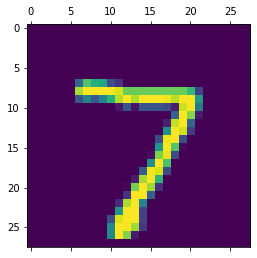

In [43]:
plt.matshow(x_test[0])

In [44]:
np.argmax(y_predicted[0])

7

In [45]:
y_test[0]

7

In [46]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.1590 - accuracy: 0.9666


[0.15898312628269196, 0.9666000008583069]

In [47]:
y_predicted_labels=[np.argmax(x) for x in y_predicted]

Text(69.0, 0.5, 'Truth')

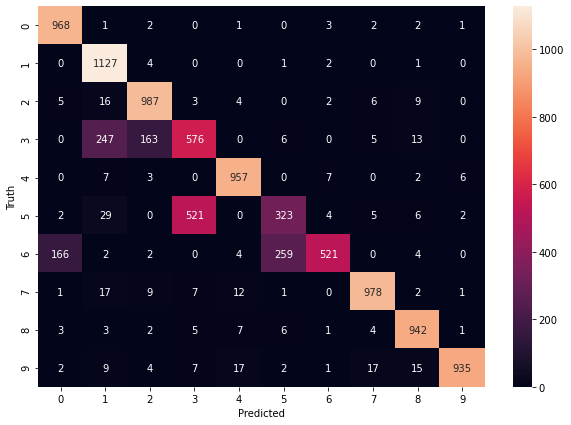

In [48]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')